In [353]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def deal(cards, num_players, hand_size):
    cards = cards[:]
    random.shuffle(cards)
    return list(chunks(cards[:num_players*hand_size], hand_size))

In [537]:
DECK_SIZE = 10
NUM_PLAYERS = 4
HAND = [4, 8]

HAND_SIZE = len(HAND)
assert(len(set(HAND)) == HAND_SIZE)
assert(max(HAND) < DECK_SIZE)
assert(min(HAND) >= 0)
assert(HAND_SIZE * NUM_PLAYERS <= DECK_SIZE)

rest_deck = list(set(range(DECK_SIZE)) - set(HAND))

chances = [(len([card for card in rest_deck if card < c]) / len(rest_deck)) ** (NUM_PLAYERS-1) for c in HAND]
print(sum(chances), chances)

wins = []
for n in range(10000):
    np.random.shuffle(rest_deck)
    hands = np.vstack([HAND, np.reshape(rest_deck[:(NUM_PLAYERS-1)*HAND_SIZE], (NUM_PLAYERS-1, HAND_SIZE))])
    wins.append(np.bincount(hands.argmax(axis=0))[0])
wins = pd.Series(wins)
wins.value_counts().sort_index()

0.794921875 [0.125, 0.669921875]


0    3361
1    6344
2     295
dtype: int64

In [517]:
CARD = 79
DECK = set(range(100)) - {CARD}
(CARD / len(DECK)) ** 3

0.5081309987952168

In [523]:
print(sum((len([card for card in rest_deck if card < c]) / len(rest_deck)) ** (NUM_PLAYERS-1) for c in HAND))

0.5722652034189681

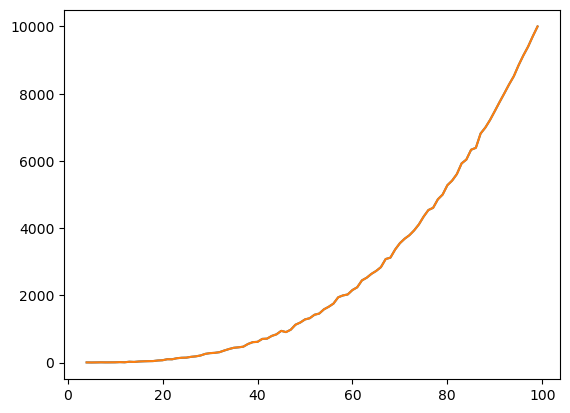

In [356]:
all_wins = pd.DataFrame(all_wins)
all_wins[1].plot(kind='line')

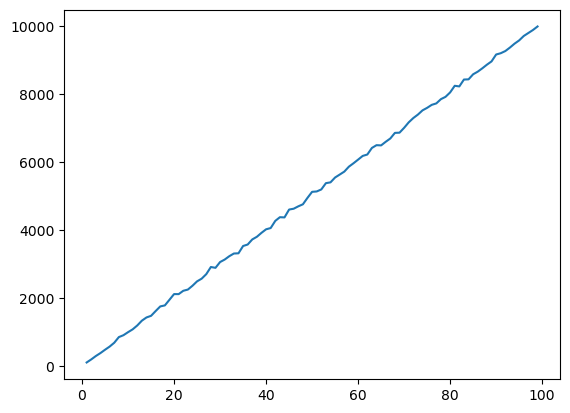